In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
T = 1000000
n_choices = 2
n_players = 2
mixed = False
# matching penies problem
M_row = np.array([[1,-1], [-1, 1]])
M_col = np.array([[-1,1], [1, -1]])


In [26]:
def get_utility(strategies):
    reward = np.zeros(n_players)
    reward_vector = np.zeros((n_players, n_choices))
    if n_players == 2:
        reward[0] = strategies[0] @ M_row @ strategies[1].T
        reward[1] = strategies[1] @ M_col @ strategies[0].T
        
        reward_vector[0] = M_row @ strategies[1].T
        reward_vector[1] = M_col @ strategies[0].T
    
        return reward, reward_vector

In [32]:
def run(eta):
    total_rewards = [0] * n_players
    x = np.full((n_players, n_choices), 1/n_choices, dtype=float)
    u = np.zeros((T, n_players, n_choices))
    s = np.zeros((n_players, n_choices))
    regret = np.zeros((n_players, T))
    sum_u = np.zeros((n_players, n_choices))
    for t in range(T):
        for i in range(n_players):
            if not mixed:
                strat = np.random.choice(np.arange(n_choices), p=x[i])
                s[i] = np.zeros(n_choices)
                s[i][strat] = 1
            else:
                s[i] = x[i]
        
        cur_rewards, u[t] = get_utility(s)
        sum_u += u[t]
        for i in range(n_players):
            total_rewards[i] += cur_rewards[i]
        for i in range(n_players):
            best_in_hind = np.argmax(sum_u[i], axis=0)
            regret[i, t] = sum_u[i][best_in_hind] - total_rewards[i]
    return regret

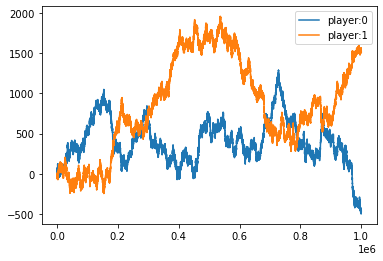

In [35]:
regret = run(eta)
for i in range(n_players):
    plt.plot(np.arange(T), regret[i], label=f'player:{i}')
    plt.legend()
plt.show()